In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5fff342ea51d49e23402683c410592072d5487798e3d888065a12dfdfa0cfeaf85aa08c4f9628b97149f851b24e02d0bb1c19821c2f480b284'

In [2]:
from aocd import submit
from aocd.models import Puzzle
day = 9
year = 2025
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [30]:
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 16, 12

In [5]:
# test_data = """"""
# data_test = test_data.splitlines()
data_test = puzzle.examples[0].input_data.splitlines()
data_test

['7,1', '11,1', '11,7', '9,7', '9,5', '2,5', '2,3', '7,3']

In [4]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(496,
 ['97839,50187',
  '97839,51418',
  '98477,51418',
  '98477,52600',
  '97593,52600',
  '97593,53826',
  '97775,53826',
  '97775,55054',
  '97845,55054',
  '97845,56233'])

In [15]:
def area(p1, p2):
    return (abs(p1[0]-p2[0])+1) * (abs(p1[1]-p2[1])+1)

In [18]:
# points = [tuple(map(int, dat.split(','))) for dat in data_test]
points = [tuple(map(int, dat.split(','))) for dat in data]

p = sorted(combinations(points, 2), key=lambda p: area(p[0], p[1]))[-1]
print(p, area(p[0], p[1]))

((85757, 83382), (13572, 17583)) 4749838800


In [19]:
puzzle.answer_a = str(area(p[0], p[1]))

That's the right answer!  You are one gold star closer to decorating the North Pole. [Continue to Part Two]


# Part 2

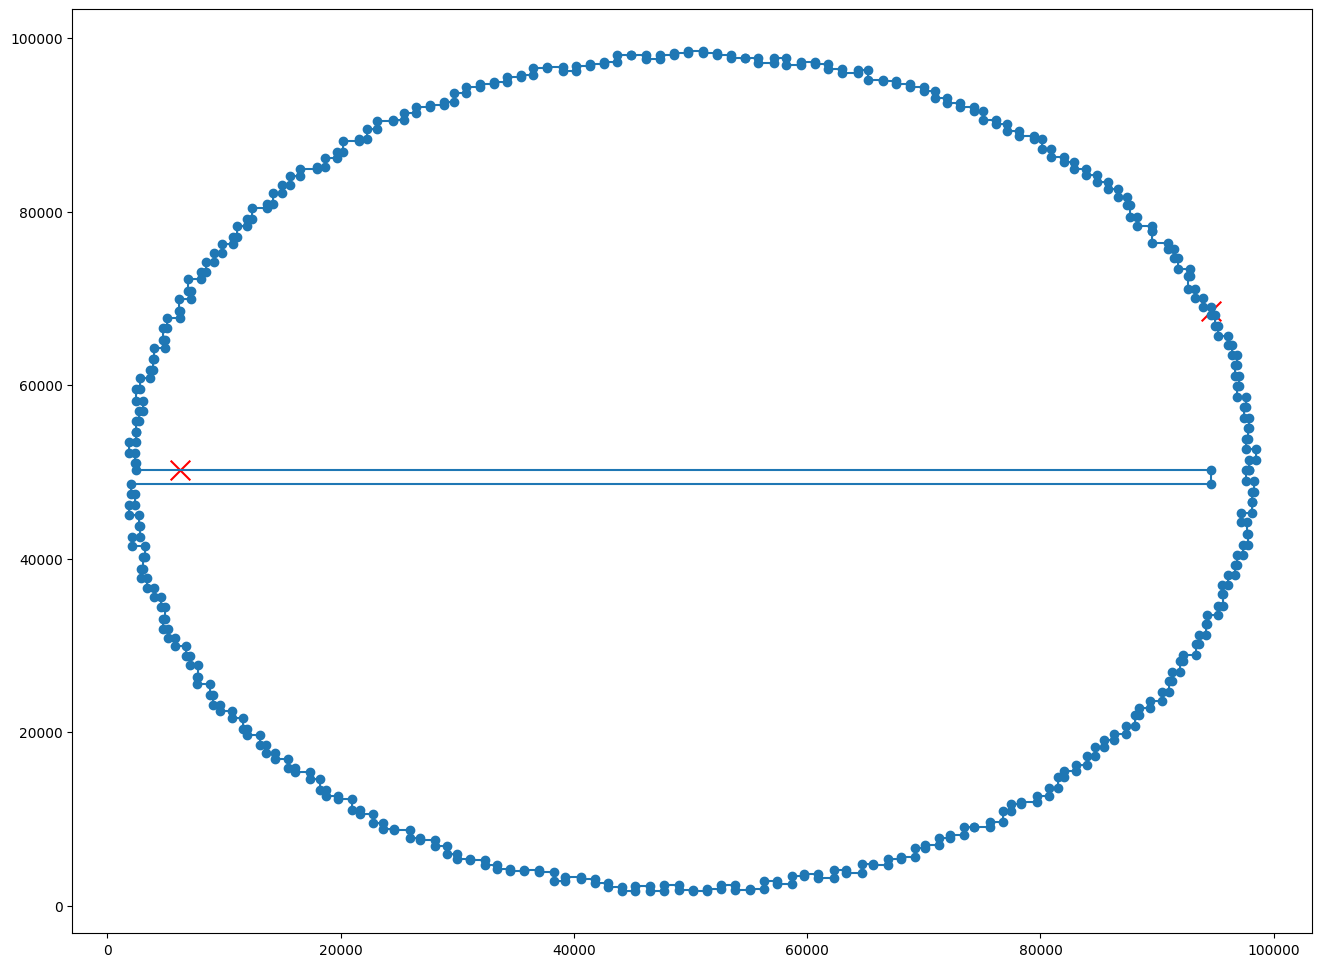

In [92]:
x, y = zip(*points)
x = x + (x[0],)
y = y + (y[0],)
plt.plot(x, y, marker='o')
plt.scatter((6271, 94582), (50174, 68563), color='red', marker='x', s=200)

In [ ]:
# visual analysis of the points shows that it should be enough to check for intersections with the longest edges
# which are both horizontal
edges = []
for i in range(len(points)-1):
    edges.append((points[i], points[i+1]))
    
longest_edges = sorted(edges, key=lambda e: abs(e[0][0]-e[1][0]) + abs(e[0][1]-e[1][1]))[-2:]

In [84]:
def get_upper_left_lower_right(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return (min(x1, x2), min(y1, y2)), (max(x1, x2), max(y1, y2))

In [103]:
valid = []
for p1, p2 in combinations(points, 2):
    p1, p2 = get_upper_left_lower_right(p1, p2)
    px1, py1 = p1
    px2, py2 = p2
    # check if p1 -> p2 intersects any of the longest edges (horizontals)
    for e in longest_edges:
        ey = e[0][1]
        if py1 < ey < py2 or py2 > ey > py1:
            break
    else:
        # check if any other point is inside the rectangle
        for p in points:
            if p == p1 or p == p2:
                continue
            x, y = p
            if px1 < x < px2 and py1 < y < py2:
                break
        else:
            valid.append((p1, p2))

In [104]:
ans = sorted(valid, key=lambda p: area(p[0], p[1]))[-1]
ans

((6271, 50174), (94582, 68563))

In [96]:
list(zip(*ans))

[(6271, 94582), (50174, 68563)]

In [97]:
area(ans[0], ans[1])

1624057680

In [ ]:
puzzle.answer_b = str(area(ans[0], ans[1]))

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 9! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [102]:
# 4HbQ

from itertools import combinations, pairwise

red = list(map(eval, data))
green = list(pairwise(red + [red[0]]))

a = b = 0

for (x,y), (u,v) in combinations(red, 2):
    if x>u: x,u = u,x
    if y>v: y,v = v,y

    size = (u-x+1) * (v-y+1)

    if size > a: a = size

    if size > b:
        for (p,q), (r,s) in green:
            if p>r: p,r = r,p
            if q>s: q,s = s,q
    
            if not (p>=u or q>=v or r<=x or s<=y): break
    
        else: b = size

print(a, b)

4749838800 1624057680
